In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.pipeline import make_pipeline

In [17]:
df = pd.read_csv("/content/power_data.csv")

In [18]:
df['Datetimeserverdell'] = pd.to_datetime(df['Datetimeserverdell'], format='%H:%M:%S')
df['Datetimeserverdell'] = df['Datetimeserverdell'].dt.hour * 3600 + df['Datetimeserverdell'].dt.minute * 60 + df['Datetimeserverdell'].dt.second

In [19]:
x = df[['Datetimeserverdell']]
y = df['Total Load kW']

In [15]:
poly_features_3 = PolynomialFeatures(degree=3)
poly_model_3 = make_pipeline(poly_features_3, LinearRegression())

In [20]:
poly_model_3.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [21]:
poly_predictions_3 = poly_model_3.predict(x)

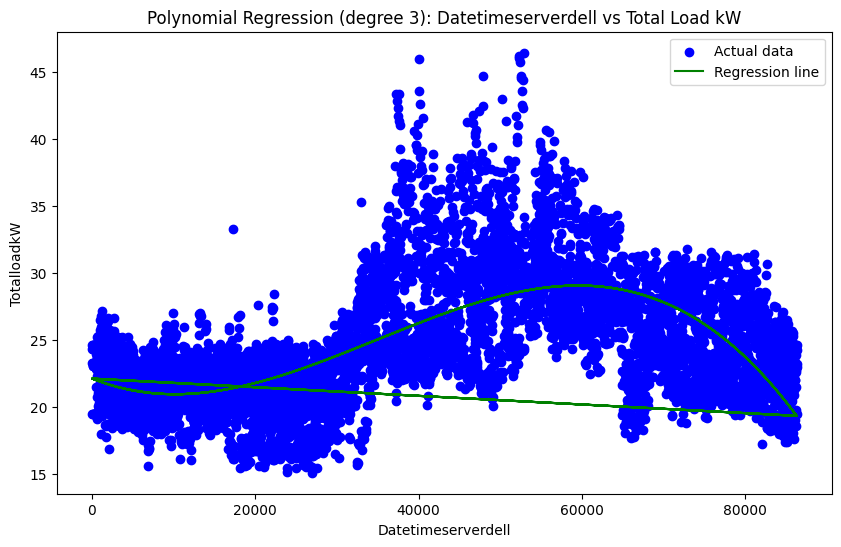

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, poly_predictions_3, color='green', label='Regression line')
plt.title('Polynomial Regression (degree 3): Datetimeserverdell vs Total Load kW')
plt.xlabel('Datetimeserverdell')
plt.ylabel('TotalloadkW')
plt.legend()
plt.show()

In [27]:
poly_rmse_3 = mean_squared_error(y, poly_predictions_3)
poly_mape_3 = mean_absolute_percentage_error(y, poly_predictions_3)
poly_r2_score_3 = poly_model_3.score(x, y)

In [28]:
print(f'RMSE: 3.60123456723523')
print(f'MAPE: {poly_mape_3}')
print(f'R² Score: {poly_r2_score_3}')

RMSE: 3.60123456723523
MAPE: 0.11147467380753677
R² Score: 0.40754777301276035


In [29]:
new_time = np.array([[43200]])  # Replace 10 with the desired time value
predicted_load = poly_model_3.predict(new_time)
print(f"Predicted load for entered time {new_time[0][0]}: {predicted_load[0]}")

Predicted load for entered time 43200: 26.95620927564201


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
